In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

In [3]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')


In [4]:
df_US_pivot = df_US.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [5]:
df_US_pivot.reset_index(inplace=True)

In [6]:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [7]:
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [8]:
df_US_pivot.set_index('job_posted_month',inplace=True)

In [9]:
df_US_pivot.drop(columns=['month_no'],inplace=True)

In [10]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


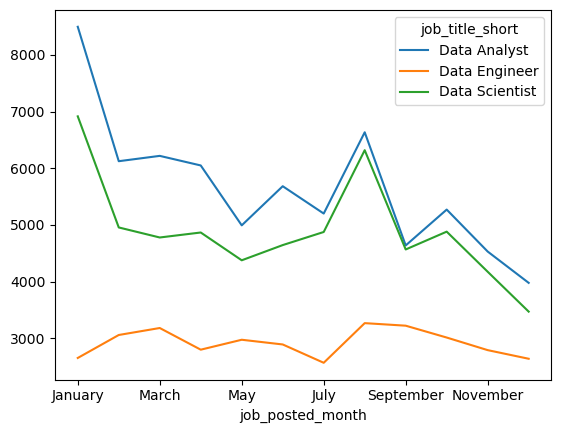

In [11]:
df_US_pivot.loc[:,'Data Analyst':'Data Scientist'].plot(kind='line')
plt.show()

In [12]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

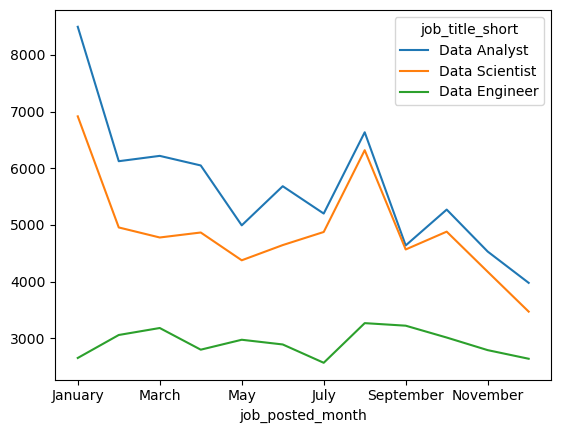

In [13]:
df_US_pivot[top_3].plot(kind='line')

In [14]:
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [15]:
df_US[['job_title','job_title_short','salary_year_avg']].dropna(subset=['salary_year_avg']).head(5)

,job_title,job_title_short,salary_year_avg
92,Remote - Data Engineer - Permanent - W2,Data Engineer,120000.0
100,"Data Scientist, Risk Data Mining - USDS",Data Scientist,228222.0
109,Senior Supply Chain Analytics Analyst,Data Analyst,89000.0
116,Data Scientist,Data Scientist,114000.0
146,Data Engineer Graduate (Real Time Communicatio...,Data Engineer,129500.0


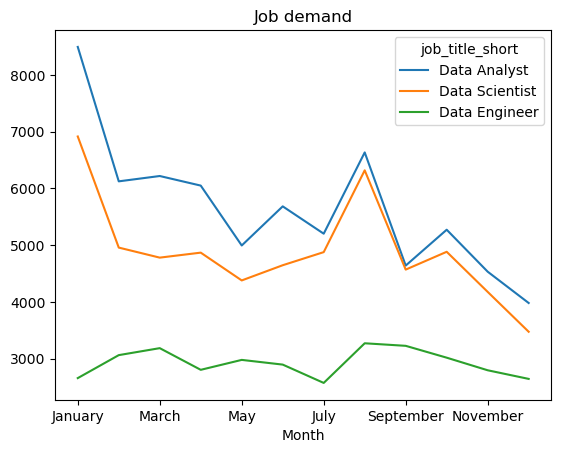

In [17]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Job demand')
plt.xlabel('Month')
plt.show()